In [2]:
import os 
#Setup location as the location of the UTKFace Dataset
WORKING_DIRECTORY = 'C:/Users/disha/OneDrive/Desktop/Deep Learning/Final Project/UTKFace'
os.chdir(WORKING_DIRECTORY)

In [3]:
# Import Fast AI vision metrics
from fastai.vision import *

In [6]:
#Change path to location of the UTKFace Dataset
path = Path('C:/Users/disha/OneDrive/Desktop/Deep Learning/Final Project/UTKFace')
path

WindowsPath('C:/Users/disha/OneDrive/Desktop/Deep Learning/Final Project/UTKFace')

In [7]:
## Loading data into the Fast AI format, setting validation percent as 20%, transformation on images, size as 224 and use imagenet stats
data = ImageDataBunch.from_folder(path,valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (18967 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
Path: C:\Users\disha\OneDrive\Desktop\Deep Learning\Final Project\UTKFace;

Valid: LabelList (4741 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
21 to 30,51 to 60,51 to 60,21 to 30,11 to 20
Path: C:\Users\disha\OneDrive\Desktop\Deep Learning\Final Project\UTKFace;

Test: None

In [0]:
data.classes

['1 to 10',
 '11 to 20',
 '21 to 30',
 '31 to 40',
 '41 to 50',
 '51 to 60',
 '61 and Above']

In [0]:
#Building a Resnet50 model
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
#Running 20 epochs for the model
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.989800,1.454088,0.508321,40:19
1,1.562698,1.283515,0.481567,05:09
2,1.293715,1.166839,0.465979,05:10
3,1.189693,1.098709,0.442595,05:10
4,1.131625,1.074242,0.423425,05:10
5,1.075330,1.009357,0.417738,05:07
6,1.033319,0.997729,0.399831,05:07
7,0.986914,0.968760,0.395197,05:09
8,0.962225,0.931491,0.382979,05:06
9,0.932560,0.953806,0.386771,05:08


In [0]:
#Export the final model
learn.export('export.pkl')

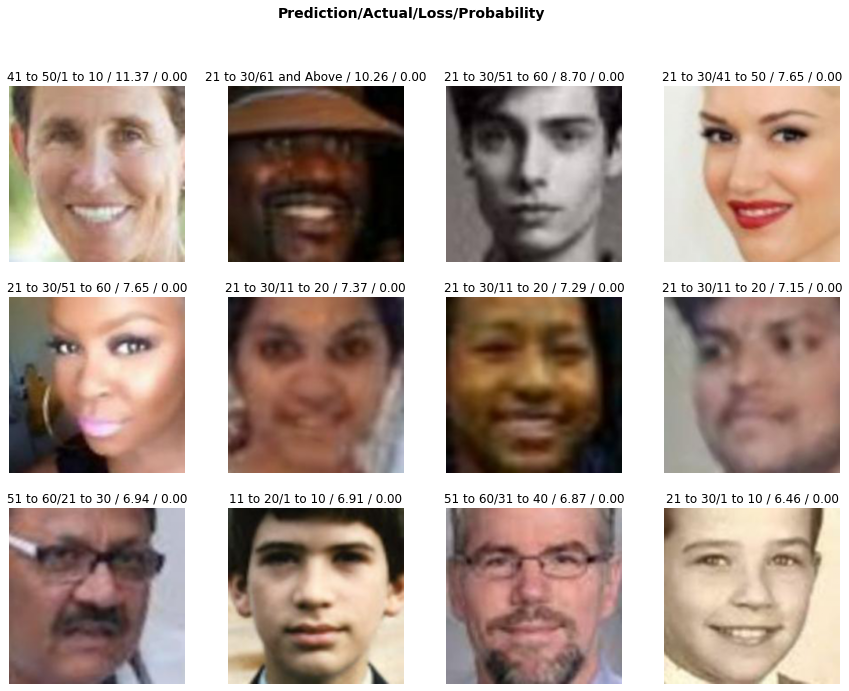

In [0]:
#Checking top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(12, figsize=(15, 11))